In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cleanlib
plt.rcParams['image.cmap'] = 'gist_heat' # set up fancy theme

from IPython.display import Javascript
import ipywidgets as widgets

gamma_w = widgets.FloatSlider(0.2, min=0.05, max=0.5, step=0.05, description="Gamma")
blurrad_w = widgets.IntSlider(6, min=1, max=10, description = "Blur radius")

gamma_w1 = widgets.FloatSlider(value=0.1, min=0.05, max=0.5, step=0.05, description="Gamma")
blurrad_w1 = widgets.IntSlider(value=3, min=1, max=10, description = "Blur radius")

def run_all(ev):
    display(Javascript('IPython.notebook.execute_cells_below()'))

button = widgets.Button(description="RUN ITERATIONS")
button.on_click(run_all)

## Let's load all input pictures

In [2]:
psf = cleanlib.make_psf_for((256,256))
model = cleanlib.getfits("input-pictures/fake-sun-model.fits")
dirtysource = cleanlib.make_model_bigpsf(model, psf) # convolute our picture using test PSF

psf_real = cleanlib.getfits("input-pictures/SRH48_4.5GHz_R_2018-06-22T030003_psf.fits")
dirtysource_real = cleanlib.getfits("input-pictures/SRH48_4.5GHz_R_2018-06-22T030003_img.fits")
psf_real = cleanlib.fix_psf(psf_real) # normalize the dimensions of PSF, see source for details

bottomlimit = 0.01 # disabled here, using the fixed number of iterations instead

## Processing test model of the "fake Sun"

**Gamma** stands for the fraction of the PSF which is substracted at the each iteration of CLEAN. The less is gamma, the more iterations will be produced. Recommended values are 0.1 and 0.2

**Bottom Limit (stop limit)** stands for intensity of background pixels on the picture, so CLEAN will stop when it reaches the background. Usually you have to setup this value for your pictures. Also in the example there exists the parameter **criticalbottom**, stating the exact numerical value of background pixels. If set, the **bottomlimit** is ignored.

**maxit** is the maximum number of allowed iterations of CLEAN. If exceeded, iterations will stop.

**Blur Radius** is the radius of gaussian convolution of the migrated pixels (*clean map*). You __must__ always set up this value to make your result pictures more realistic and to preserve their structure.

In [3]:
display(gamma_w, blurrad_w, button)

FloatSlider(value=0.2, description='Gamma', max=0.5, min=0.05, step=0.05)

IntSlider(value=6, description='Blur radius', max=10, min=1)

Button(description='RUN ITERATIONS', style=ButtonStyle())

In [4]:
clean, dirtyoutput = cleanlib.makeCleanBigPSF(dirtysource, psf, blurrad_w.value, bottomlimit,\
                                     maxit=100, gamma=gamma_w.value, criticalbottom=25000)

pictures = (dirtysource, clean, dirtyoutput, clean + dirtyoutput)
fft_pictures = [cleanlib.fft_array(pic) for pic in pictures]
fft_pictures = np.arcsinh(fft_pictures)

110562.81914352324
full = 395429551.33278847, sourcepic = 395429551.33278847, it = 0
88450.2553148186
84107.28446809862
70772.4390157634
67296.12256959216
56649.62663028083
53870.194304946715
51529.00846848452
50254.74969918136
50555.09080665819
47647.63789686744
full = 395429551.33278847, sourcepic = 395429551.33278847, it = 10
43080.05948884814
42435.739891732235
41333.22014613316
41388.7608500339
38990.2341270203
34670.03957712177
34414.044981606654
33977.71416413651
33477.479037601515
32387.32246722408
full = 395429551.33278847, sourcepic = 395429551.33278847, it = 20
29516.090407310217
29880.11557626982
30539.64155025701
29115.130535931767
29070.1144243816
28644.227393551508
25984.005448990116
26035.55190541678
26489.094934359353
25299.125784634703
full = 395429551.33278847, sourcepic = 395429551.33278847, it = 30
iterations: 31


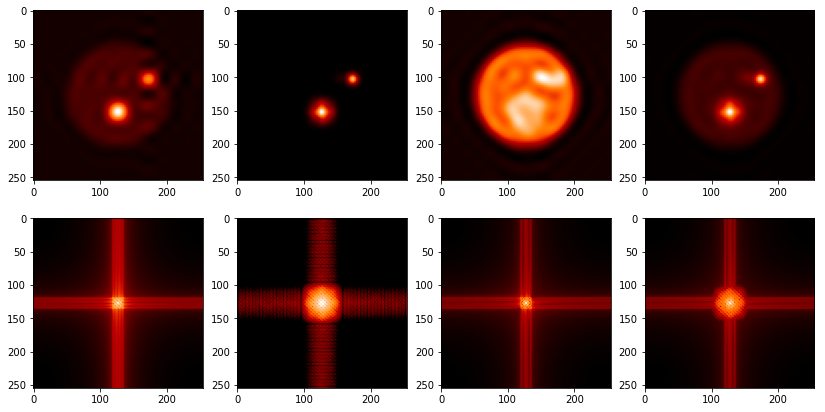

In [5]:
fig, axes = plt.subplots(figsize=(14, 7), nrows=2, ncols=len(pictures))

for i in range(0, len(pictures)):
    axes[0][i].imshow(pictures[i])
    axes[1][i].imshow(fft_pictures[i])

## Apply CLEAN algorithm to the picture of the real Sun

The images of dirty source and PSF were obtained from the SRH-48 (rus: Сибирский радиогелиограф) radiotelescope at the frequency 4.5 GHz

In [6]:
display(gamma_w1, blurrad_w1, button)

FloatSlider(value=0.1, description='Gamma', max=0.5, min=0.05, step=0.05)

IntSlider(value=3, description='Blur radius', max=10, min=1)

Button(description='RUN ITERATIONS', style=ButtonStyle())

In [7]:
clean, dirtyoutput = cleanlib.makeCleanBigPSF(dirtysource_real, psf_real, blurrad_w1.value,\
                                              bottomlimit, maxit=300, gamma=gamma_w1.value,\
                                              criticalbottom=150)

pictures = (dirtysource_real, clean, dirtyoutput, clean + dirtyoutput)
fft_pictures = [cleanlib.fft_array(pic) for pic in pictures]

pictures = np.arcsinh(pictures)
fft_pictures = np.arcsinh(fft_pictures)

1967.6572694820518
full = 2351346.637408577, sourcepic = 2351346.6374085774, it = 0
1770.8915425338466
1593.8023882804619
1434.4221494524156
1290.979934507174
1161.8819410564565
1045.693746950811
961.8004480213984
940.8694032458804
865.3709829360422
846.5530569326328
full = 2351346.6374085774, sourcepic = 2351346.6374085774, it = 10
779.1454461096772
761.6953654067128
701.9578772466895
685.3397429629981
631.9789970212661
616.6416098486338
569.4072284186091
554.8265015466532
512.6066278588045
499.21069997626364
full = 2351346.637408578, sourcepic = 2351346.6374085774, it = 20
461.94503359422333
449.1604047094677
416.8205500148605
404.13386696942445
375.03136092738004
363.62106113106364
338.3572516069331
327.16430239971356
304.4300049621547
294.36271040569443
full = 2351346.6374085774, sourcepic = 2351346.6374085774, it = 30
274.71926720048265
264.8536125124356
247.27341185032105
239.34011191069644
238.30429329136567
224.91024467813403
216.76039410710757
214.47847359564352
203.6713273636

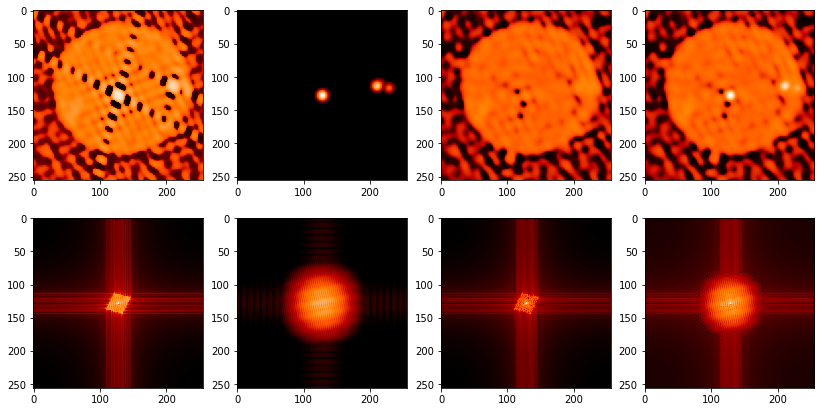

In [8]:
fig, axes = plt.subplots(figsize=(14, 7), nrows=2, ncols=len(pictures))

for i in range(0, len(pictures)):
    axes[0][i].imshow(pictures[i], vmax = 8.8)
    axes[1][i].imshow(fft_pictures[i], vmax=15.5)